In [183]:
#Data Cleaning - Correcting the date format to yyy-mm-dd
import pandas as pd

df = pd.read_csv("C:/Users/Owner/Desktop/Projects/Marketing_data_EDA_Analysis/marketing_dataset.csv")

# Define a function to parse dates with different formats
def parse_dates(date):
    # Try different date formats
    try:
        # Try parsing as MM/DD/YY
        return pd.to_datetime(date, format='%m/%d/%y', errors='raise')
    except ValueError:
        try:
            # Try parsing as YYYY-MM-DD
            return pd.to_datetime(date, format='%Y-%m-%d', errors='raise')
        except ValueError:
            # If both fail, return NaT (Not a Time)
            return pd.NaT

# Apply the function only to the 'Dt_Customer' column
df['Dt_Customer_Corrected'] = df['Dt_Customer'].apply(parse_dates)

# Print the updated dataframe to verify the corrected dates
print(df[['Dt_Customer', 'Dt_Customer_Corrected']].head())  

# Check for any NaT values indicating unparsed dates
missing_dates = df['Dt_Customer_Corrected'].isna().sum()
print(f"Number of missing dates after parsing: {missing_dates}")

df.to_csv("C:/Users/Owner/Desktop/Projects/Marketing_data_EDA_Analysis/corrected_marketing_dataset.csv", index=False)


  Dt_Customer Dt_Customer_Corrected
0     5/18/14            2014-05-18
1  2001-06-13            2001-06-13
2     4/13/13            2013-04-13
3     6/23/14            2014-06-23
4  2010-05-13            2010-05-13
Number of missing dates after parsing: 0


In [184]:
#Data Cleaning - Fixing the null values
import pandas as pd

df = pd.read_csv("C:/Users/Owner/Desktop/Projects/Marketing_data_EDA_Analysis/corrected_marketing_dataset.csv")

# Remove any currency symbols and convert 'Income' to numeric type, in case it has currency symbols
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Check for null values in 'Income' column before filling
print(f"Number of null values in Income before filling: {df['Income'].isna().sum()}")

# Group by 'Education' and calculate the mean 'Income' for each group
education_income_means = df.groupby('Education')['Income'].mean()

# Define a function to fill missing values based on the Education group mean
def fill_missing_income(row):
    if pd.isna(row['Income']):
        return education_income_means[row['Education']]  
    else:
        return row['Income']  

# Apply the function to fill missing 'Income' values
df['Income'] = df.apply(fill_missing_income, axis=1)

# Check for null values in 'Income' column after filling
print(f"Number of null values in Income after filling: {df['Income'].isna().sum()}")

# Replace the values in 'Dt_Customer' with those from 'Dt_Customer_Corrected'
if 'Dt_Customer_Corrected' in df.columns:
    df['Dt_Customer'] = df['Dt_Customer_Corrected']

df.to_csv("C:/Users/Owner/Desktop/Projects/Marketing_data_EDA_Analysis/cleaned_marketing_dataset.csv", index=False)
print(df[['Education', 'Income']].head())

Number of null values in Income before filling: 24
Number of null values in Income after filling: 0
    Education  Income
0  Graduation  1730.0
1  Graduation  2447.0
2  Graduation  3502.0
3         PhD  4023.0
4  Graduation  4428.0


In [185]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/Owner/Desktop/Projects/Marketing_data_EDA_Analysis/cleaned_marketing_dataset.csv")
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2240 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Dt_Customer            2240 non-null   object 
 8   Recency                2240 non-null   int64  
 9   MntWines               2240 non-null   int64  
 10  MntFruits              2240 non-null   int64  
 11  MntMeatProducts        2240 non-null   int64  
 12  MntFishProducts        2240 non-null   int64  
 13  MntSweetProducts       2240 non-null   int64  
 14  MntGoldProds           2240 non-null   int64  

In [186]:
# Summary Statistics
print("\nSummary Statistics")
print(data.describe())


Summary Statistics
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52253.592375     0.444196     0.506250   
std     3246.662198    11.984069   25039.085601     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51609.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.0

In [187]:
# Data Cleaning - Convert 'ID' to string type
data['ID'] = data['ID'].astype(str)
print("\nUpdated Data Types")
print(data.dtypes)


Updated Data Types
ID                        object
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer               object
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
AcceptedCmp3               int64
AcceptedCmp4               int64
AcceptedCmp5               int64
AcceptedCmp1               int64
AcceptedCmp2               int64
Response                   int64
Complain                   int64
Country                   object
Dt_Customer_Corrected     object
dtype: object


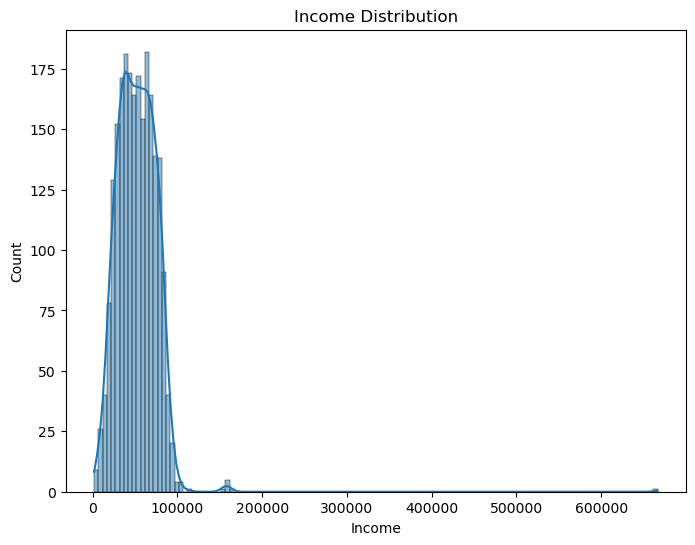

In [188]:
# Visualization: Income Distribution (Outliers Identification)
plt.figure(figsize=(8,6))
sns.histplot(data['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

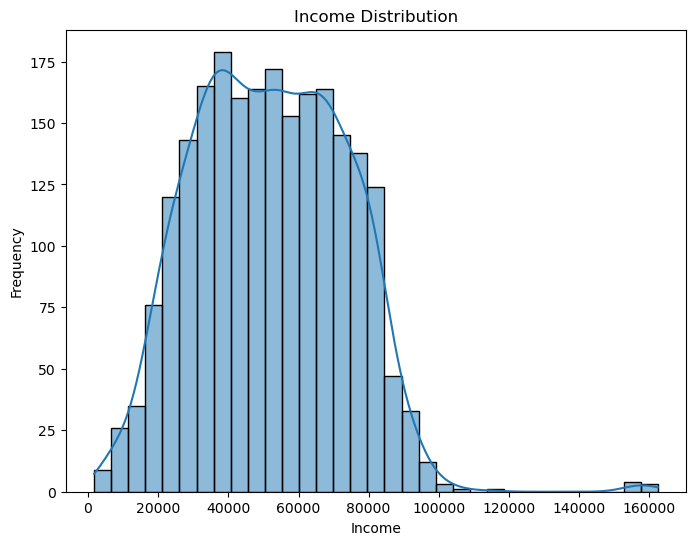

In [205]:
# Visualization: Income Distribution (Outlier removed)

# Remove the outlier with income >= 666666
filtered_data = data[data['Income'] < 666666]

# Visualization: Income Distribution without the outlier
plt.figure(figsize=(8,6))
sns.histplot(filtered_data['Income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

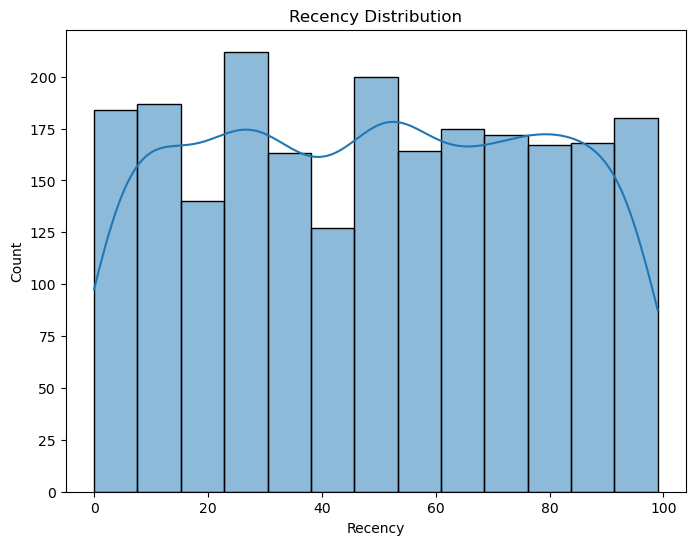

In [190]:
# Visualization: Recency Distribution
plt.figure(figsize=(8,6))
sns.histplot(filtered_data['Recency'], kde=True)
plt.title('Recency Distribution')
plt.show()

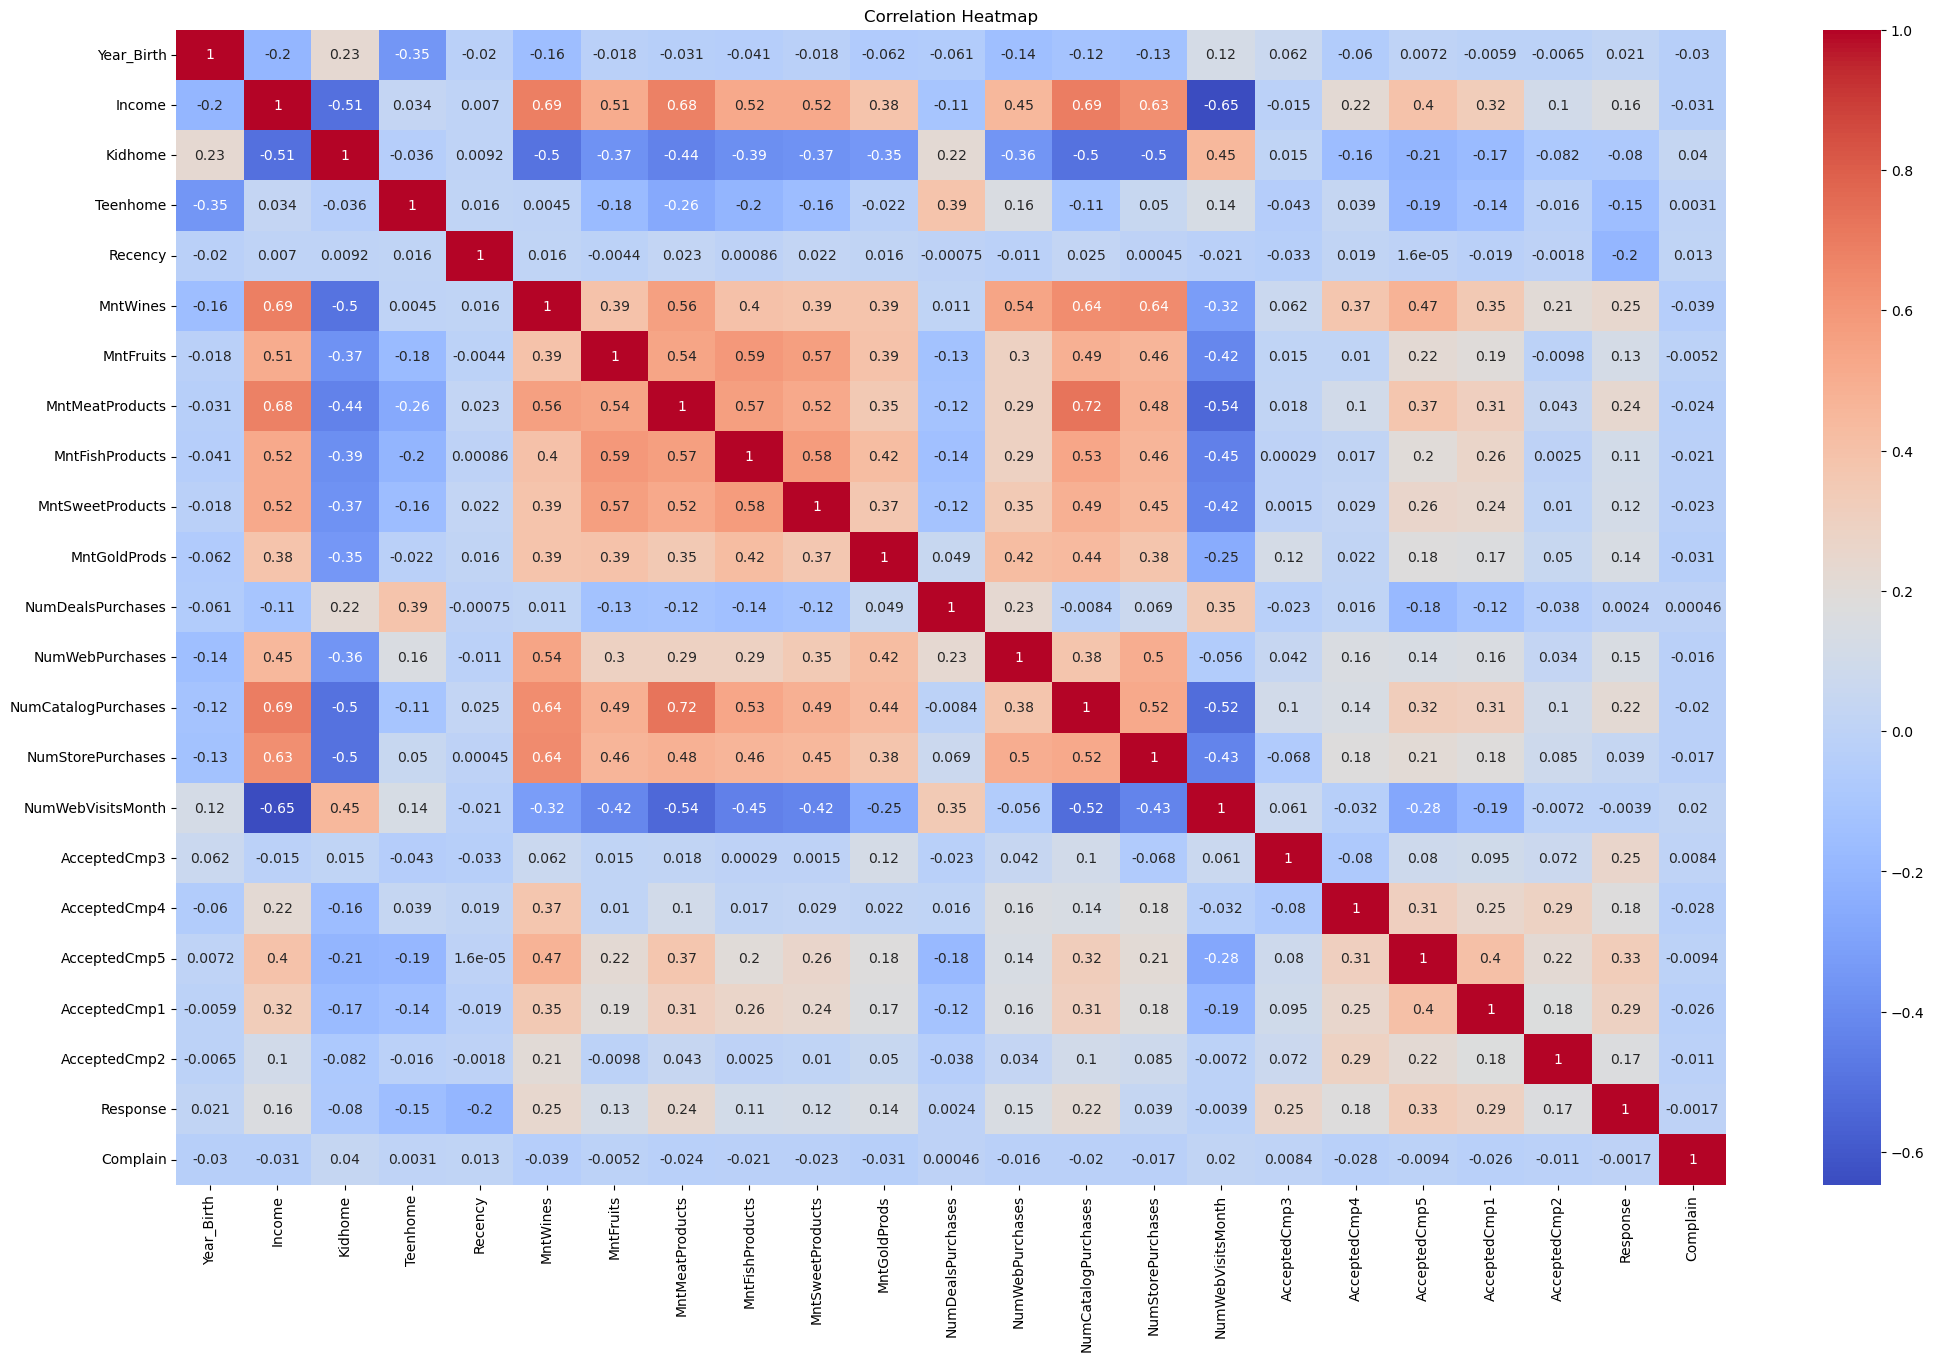

In [191]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(filtered_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1644\241207424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age'] = 2024 - filtered_data['Year_Birth']


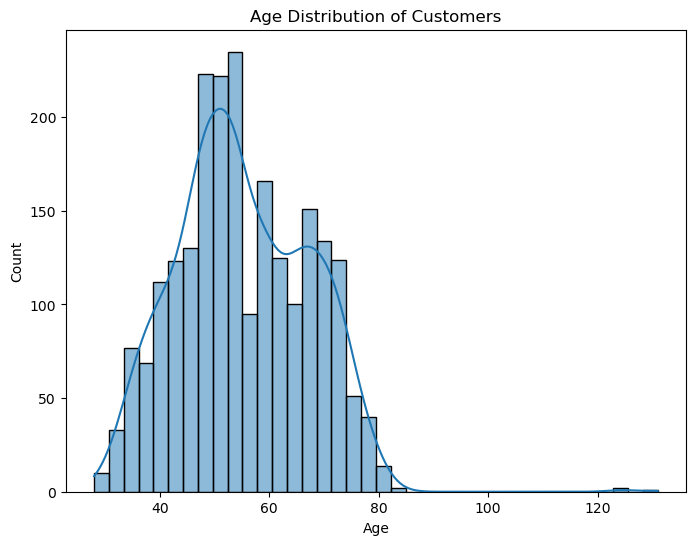

In [192]:
# Age Calculation from Year of Birth (assuming current year as 2024) (Outliers Identification)
filtered_data['Age'] = 2024 - filtered_data['Year_Birth']
# Visualization: Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(filtered_data['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1644\1078029434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1['Age'] = 2024 - filtered_data1['Year_Birth']


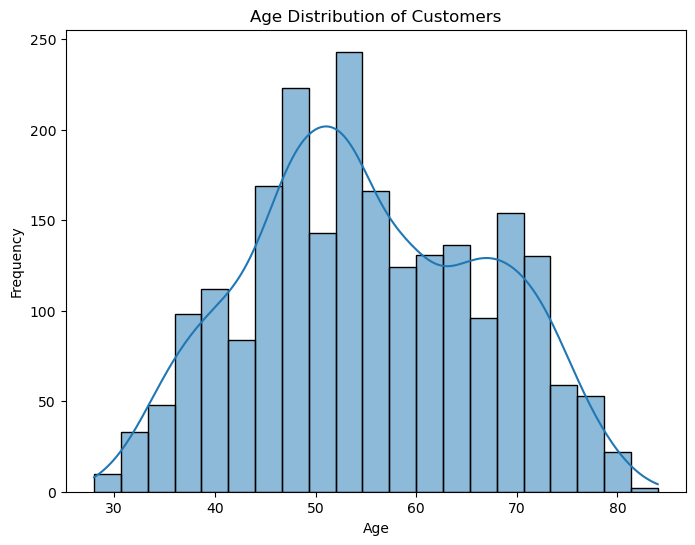

In [206]:
# Visualization: Age Distribution (Outliers removed)
filtered_data1 = filtered_data[filtered_data['Year_Birth'] > 1900]

# Age Calculation from Year of Birth (assuming current year as 2024)
filtered_data1['Age'] = 2024 - filtered_data1['Year_Birth']
plt.figure(figsize=(8,6))
sns.histplot(filtered_data1['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

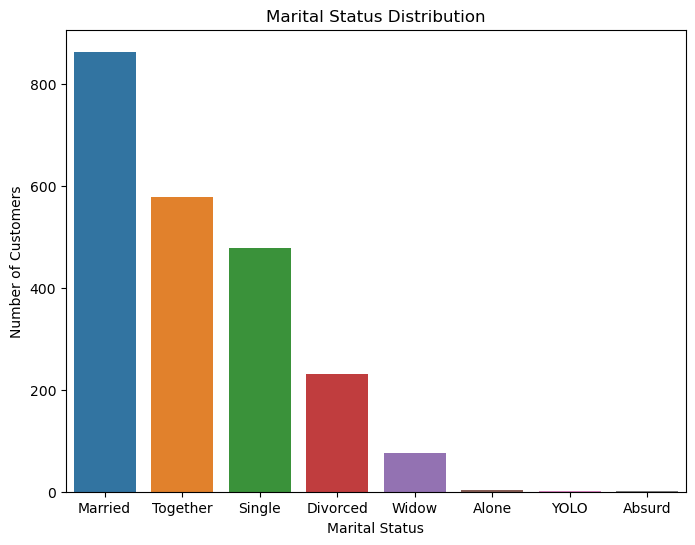

In [194]:
# Visualization: Marital Status Distribution (Outliers Identified)
marital_counts = filtered_data1['Marital_Status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Marital Status Distribution')
plt.ylabel('Number of Customers(with Outliers)')
plt.xlabel('Marital Status')
plt.show()

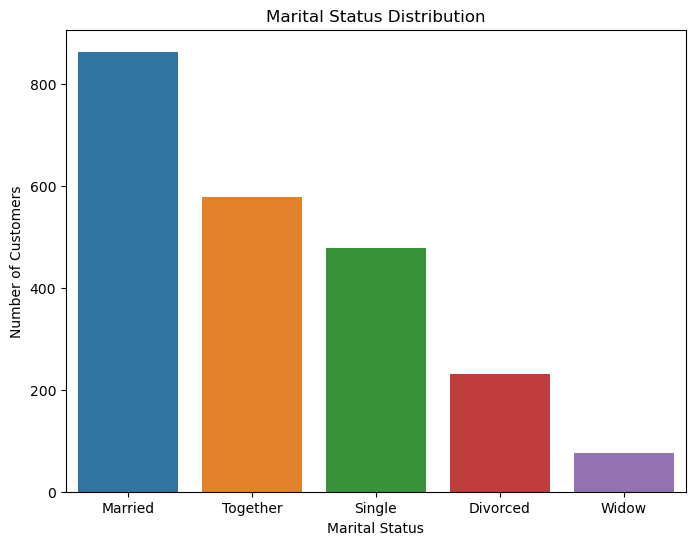

In [207]:
# Visualization: Marital Status Distribution(Outliers removed)
filtered_data2 = filtered_data1[~filtered_data1['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])]
marital_counts_filtered = filtered_data2['Marital_Status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=marital_counts_filtered.index, y=marital_counts_filtered.values)
plt.title('Marital Status Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Marital Status')
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1644\3609379809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Total_Purchases'] = filtered_data2['NumWebPurchases'] + filtered_data2['NumStorePurchases'] + filtered_data2['NumCatalogPurchases']


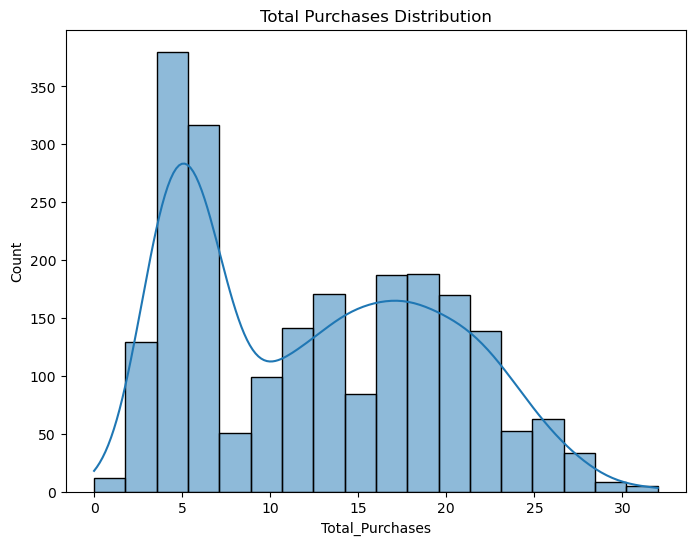

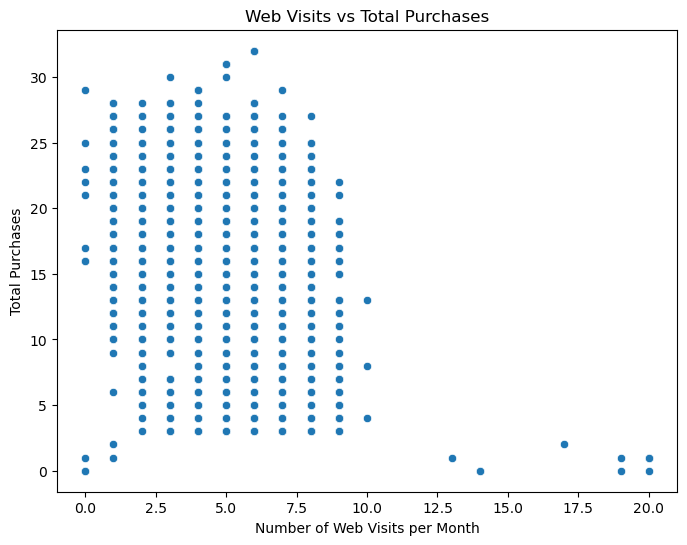

In [196]:
# Visualization: Total Purchases Distribution (NumWebPurchases + NumStorePurchases + NumCatalogPurchases)
filtered_data2['Total_Purchases'] = filtered_data2['NumWebPurchases'] + filtered_data2['NumStorePurchases'] + filtered_data2['NumCatalogPurchases']
plt.figure(figsize=(8,6))
sns.histplot(filtered_data2['Total_Purchases'], kde=True)
plt.title('Total Purchases Distribution')
plt.show()
# Visualization: Web Visits vs Purchases
plt.figure(figsize=(8,6))
sns.scatterplot(x=filtered_data2['NumWebVisitsMonth'], y=filtered_data2['Total_Purchases'])
plt.title('Web Visits vs Total Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Total Purchases')
plt.show()

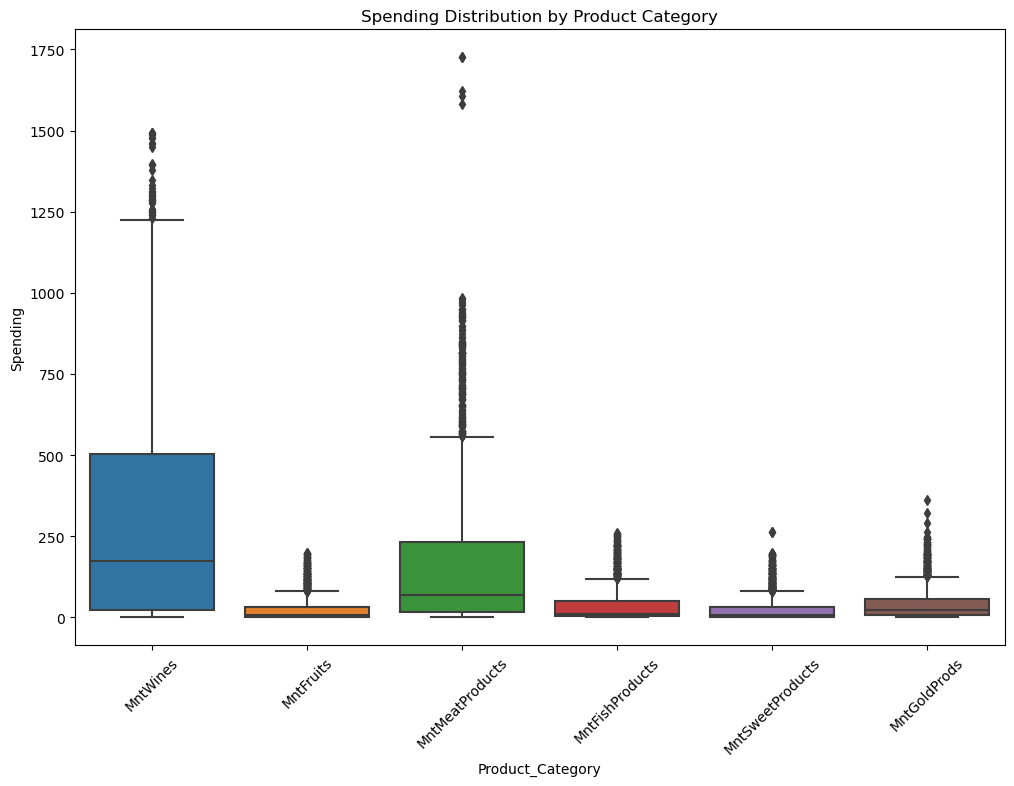

In [197]:
# Visualization: Spending on Different Product Categories
plt.figure(figsize=(12,8))

# Use 'melt' to reshape the dataframe into a long format suitable for boxplot
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
filtered_data2_melted = filtered_data2.melt(value_vars=spending_columns, var_name='Product_Category', value_name='Spending')
sns.boxplot(x='Product_Category', y='Spending', data=filtered_data2_melted)
plt.title('Spending Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_1644\2491196753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Total_Spending'] = filtered_data2['MntWines'] + filtered_data2['MntFruits'] + filtered_data2['MntMeatProducts'] + filtered_data2['MntFishProducts'] + filtered_data2['MntSweetProducts'] + filtered_data2['MntGoldProds']


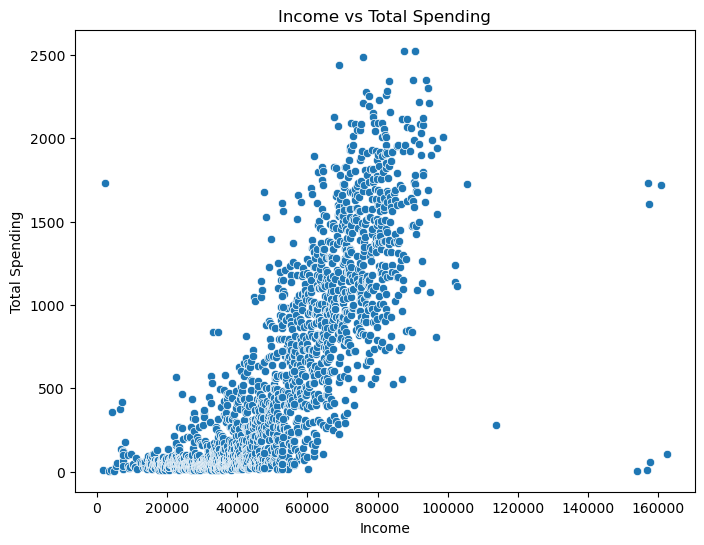

In [198]:
# Visualization: Income vs Spending (Total Mnt)
filtered_data2['Total_Spending'] = filtered_data2['MntWines'] + filtered_data2['MntFruits'] + filtered_data2['MntMeatProducts'] + filtered_data2['MntFishProducts'] + filtered_data2['MntSweetProducts'] + filtered_data2['MntGoldProds']
plt.figure(figsize=(8,6))
sns.scatterplot(x=filtered_data2['Income'], y=filtered_data2['Total_Spending'])
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


Average Spending by Marital Status
                  MntWines  MntFruits  MntMeatProducts
Marital_Status                                        
Divorced        326.186147  27.519481       150.822511
Married         299.480324  25.734954       160.681713
Single          288.916493  26.891441       182.478079
Together        306.565744  25.164360       167.681661
Widow           369.272727  33.090909       189.285714


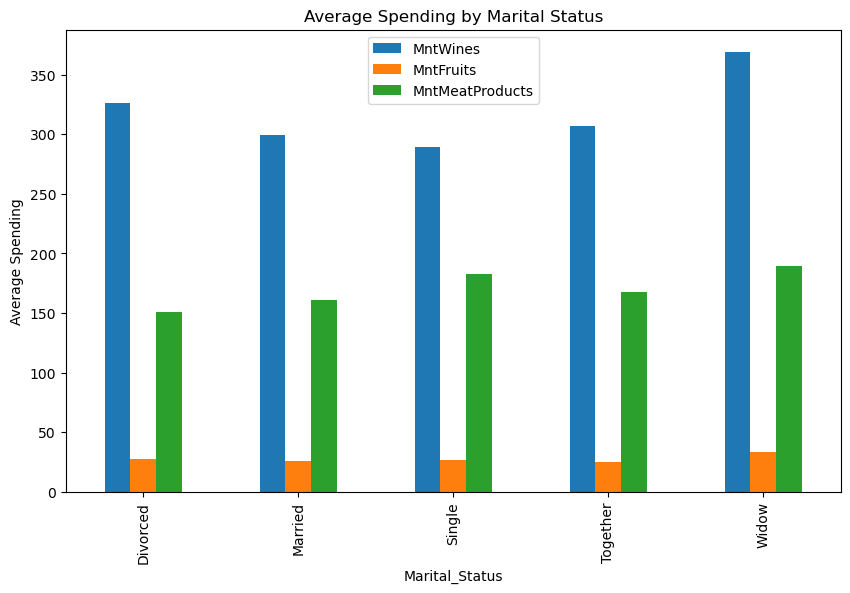

In [199]:
# Visualization: Average Spending by Marital Status
spending_by_marital_status = filtered_data2.groupby('Marital_Status').mean()[['MntWines', 'MntFruits', 'MntMeatProducts']]
print("\nAverage Spending by Marital Status")
print(spending_by_marital_status)
spending_by_marital_status.plot(kind='bar', figsize=(10,6))
plt.title('Average Spending by Marital Status')
plt.ylabel('Average Spending')
plt.show()

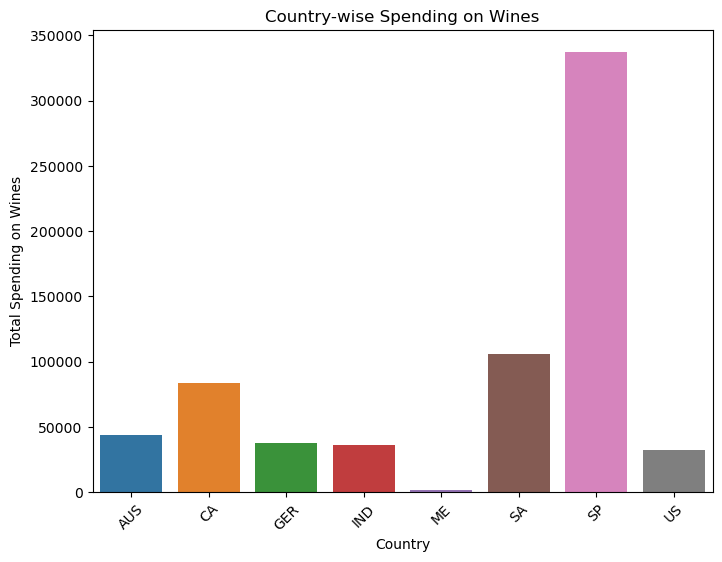

In [200]:
# Visualization: Country-wise Spending on Wines
country_wine_spending = filtered_data2.groupby('Country')['MntWines'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Country', y='MntWines', data=country_wine_spending) 
plt.title('Country-wise Spending on Wines')
plt.ylabel('Total Spending on Wines')
plt.xticks(rotation=45)
plt.show()
